## 3821Б1ПР1 Кашин Степан

# 8. Плохо обусловленные матрицы

Провести серию экспериментов, тестирующую команды `scipy.linalg.solve`, `numpy.linalg.cond`
на плохо обусловленных матрицах вида
$A=LU$, где $L$, $U$ – случайные нижняя треугольная и верхняя треугольная
матрицы соответственно с малыми диагональными элементами.

Экспериментальным путем для каждого из перечисленных классов установить
диапазон изменения порядка матрицы, при котором число обусловленности не
превосходит ведичины порядка $10^{16}$. Построить графики значений,
выдаваемых функцией `scipy.linalg.cond`. Построить графики используемого этими функциями времени. Для каждой
матрицы задать случайно решение $x$. По матрице $A$ и решению $x$
сгенерировать правую часть системы линейных уравнений $b$. Решить систему
$Ax=b$, используя `scipy.linalg.solve`. Построить графики относительной ошибки
решения и невязки. Объяснить результаты.

Перед началом выполнения работы импортируем все неебходимые для работы библиотеки.

In [31]:
from numpy.linalg import cond, norm 
from scipy.linalg import solve
import matplotlib.pyplot
import numpy
import time

Импортируем функции `cornd,norm` из `numpy.linalg` теперь к ним можно обращаться напрямую (`cond, norm`), так-же `solve`
Импортируем библиотеки `matplotlib.pyplot` и `numpy`

Задаём переменные которые будут использоваться на протяжение всей программы

In [32]:
littel=10
percCond=[]
condGraf=[]
timeCond=[]
nvList=[]
misteces=[]

`littel` - задает порядок малости диагональных элементов 

`percCond` - список, в котором хранятся результаты проверки на >$10^{16}$

`condGraf` - список чисел обусловленности


`timeCond` - список, в котором хранится время выполнения функции `numpy.linalg.cond`

`nvList` - список неувязок

`misteces` - тут хранится список относительных ошибок решения

Проведём исследование на матрицах n порадка где n $1\le n
\le 9$. Программа будет генерировать треугольные матрицы $U$,$L$,диоганальные элементы в которых будут маыми, поэтому разделим эти элементы на некую величину. После этого мы получим матрицу через произведение матриц $L$ и $U$ `A=L.dot(U)`. 

После получение матрицы $A$ оцениваем время работы `numpy.linalg.cond`и порядок числа обусловленности.

Далее Формируется вектор $B$ на основе соотношения $AX=B$  `b=a.dot(x)`, где $X$ - случайно сгенерированный вектор.


In [33]:
for N in range(1, 10):
    U = numpy.triu(numpy.random.rand(N, N))
    L = numpy.tril(numpy.random.rand(N, N))
    
    for i in range(N):
        U[i][i] = U[i][i] / littel
        L[i][i] = L[i][i] / littel
        
    A = L.dot(U)
    
    
    FirstTime = time.time() #засекаем время на начало работы numpy.linalg.cond
    
    for i in range(10**3):
        cond_a=cond(A)
        
    RealTime=time.time()-FirstTime # получаем время работы numpy.linalg.cond вычив из текущего времени время на начало работы numpy.linalg.cond  
    timeCond.append(RealTime)
    
    # Оцениваем порядок числа обусловленности
    if cond_a>10**16:
        percCond.append("{} -> Превосходит".format(N))
    else:
        percCond.append("{} -> Не превосходит".format(N))    
    condGraf.append(cond_a)
    #Число обусловленности print(cond_a) 
    
    
    X=numpy.random.rand(N) #Генирируем случайное решение X
    B=A.dot(X)
    
    X1=solve(A,B)
    
    norm_nvList=norm(X1-X)
    nvList.append(norm_nvList)
    norm_misteces=norm_nvList/norm(X)
    misteces.append(norm_misteces)   

C:\Users\BD9E~1\AppData\Local\Temp/ipykernel_1908/1065451764.py:32: LinAlgWarning: Ill-conditioned matrix (rcond=1.44605e-17): result may not be accurate.
  X1=solve(A,B)


Оценим превосходство числа $10^{16}$

In [34]:
print(percCond) 

['1 -> Не превосходит', '2 -> Не превосходит', '3 -> Не превосходит', '4 -> Не превосходит', '5 -> Не превосходит', '6 -> Не превосходит', '7 -> Не превосходит', '8 -> Превосходит', '9 -> Не превосходит']


Text(0.5, 1.0, 'Condition')

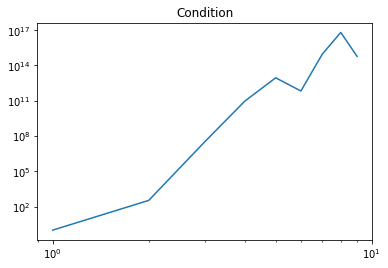

In [38]:
Xline=list(range(1,10))
matplotlib.pyplot.loglog(Xline, condGraf)
matplotlib.pyplot.title('Condition')